In [2]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Veriyi oku
df = pd.read_csv('customer_churn_telecom_services.csv')



In [3]:
yeni_kolonlar = {
    'gender': 'Cinsiyet',
    'SeniorCitizen': 'KıdemliVatandaş',
    'Partner': 'Eş',
    'Dependents': 'BağımlıKişiler',
    'tenure': 'AbonelikSüresi (Ay)',
    'PhoneService': 'TelefonHizmeti',
    'MultipleLines': 'ÇokluHat',
    'InternetService': 'İnternetHizmeti',
    'OnlineSecurity': 'ÇevrimiçiGüvenlik',
    'OnlineBackup': 'ÇevrimiçiYedekleme',
    'DeviceProtection': 'CihazKoruması',
    'TechSupport': 'TeknikDestek',
    'StreamingTV': 'TVYayını',
    'StreamingMovies': 'FilmYayını',
    'Contract': 'Sözleşme',
    'PaperlessBilling': 'KağıtsızFatura',
    'PaymentMethod': 'ÖdemeYöntemi',
    'MonthlyCharges': 'AylıkÜcret',
    'TotalCharges': 'ToplamÜcret',
    'Churn': 'MüşteriKaybı'
}
df = df.rename(columns=yeni_kolonlar)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cinsiyet             7043 non-null   object 
 1   KıdemliVatandaş      7043 non-null   int64  
 2   Eş                   7043 non-null   object 
 3   BağımlıKişiler       7043 non-null   object 
 4   AbonelikSüresi (Ay)  7043 non-null   int64  
 5   TelefonHizmeti       7043 non-null   object 
 6   ÇokluHat             7043 non-null   object 
 7   İnternetHizmeti      7043 non-null   object 
 8   ÇevrimiçiGüvenlik    7043 non-null   object 
 9   ÇevrimiçiYedekleme   7043 non-null   object 
 10  CihazKoruması        7043 non-null   object 
 11  TeknikDestek         7043 non-null   object 
 12  TVYayını             7043 non-null   object 
 13  FilmYayını           7043 non-null   object 
 14  Sözleşme             7043 non-null   object 
 15  KağıtsızFatura       7043 non-null   o

In [5]:
df.isna().sum()

Cinsiyet                0
KıdemliVatandaş         0
Eş                      0
BağımlıKişiler          0
AbonelikSüresi (Ay)     0
TelefonHizmeti          0
ÇokluHat                0
İnternetHizmeti         0
ÇevrimiçiGüvenlik       0
ÇevrimiçiYedekleme      0
CihazKoruması           0
TeknikDestek            0
TVYayını                0
FilmYayını              0
Sözleşme                0
KağıtsızFatura          0
ÖdemeYöntemi            0
AylıkÜcret              0
ToplamÜcret            11
MüşteriKaybı            0
dtype: int64

In [ ]:
df=df.dropna()

In [7]:
df.isna().sum()

Cinsiyet               0
KıdemliVatandaş        0
Eş                     0
BağımlıKişiler         0
AbonelikSüresi (Ay)    0
TelefonHizmeti         0
ÇokluHat               0
İnternetHizmeti        0
ÇevrimiçiGüvenlik      0
ÇevrimiçiYedekleme     0
CihazKoruması          0
TeknikDestek           0
TVYayını               0
FilmYayını             0
Sözleşme               0
KağıtsızFatura         0
ÖdemeYöntemi           0
AylıkÜcret             0
ToplamÜcret            0
MüşteriKaybı           0
dtype: int64

In [8]:
df.head()

,Cinsiyet,KıdemliVatandaş,Eş,BağımlıKişiler,AbonelikSüresi (Ay),TelefonHizmeti,ÇokluHat,İnternetHizmeti,ÇevrimiçiGüvenlik,ÇevrimiçiYedekleme,CihazKoruması,TeknikDestek,TVYayını,FilmYayını,Sözleşme,KağıtsızFatura,ÖdemeYöntemi,AylıkÜcret,ToplamÜcret,MüşteriKaybı
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
KıdemliVatandaş,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
AbonelikSüresi (Ay),7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
AylıkÜcret,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
ToplamÜcret,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

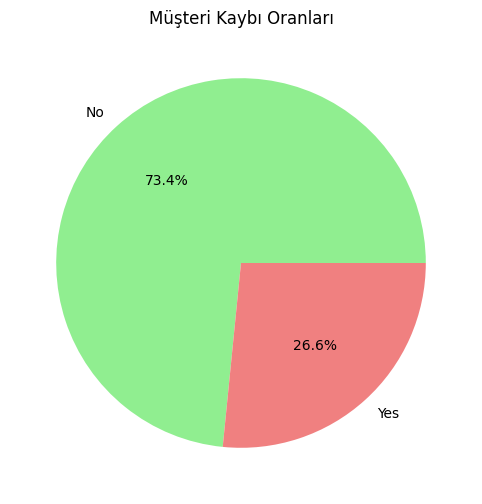

<Figure size 1200x600 with 0 Axes>

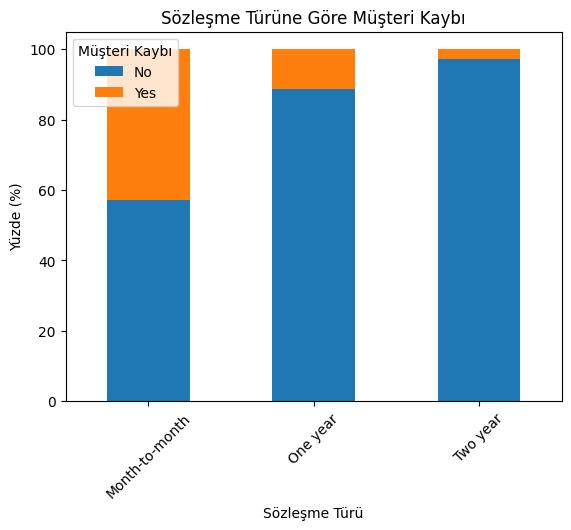

<Figure size 1200x600 with 0 Axes>

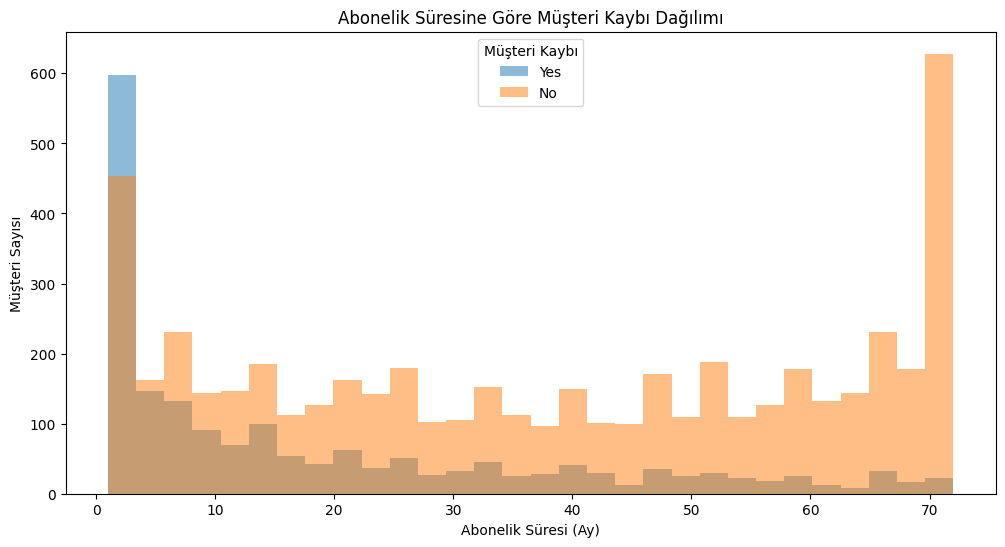

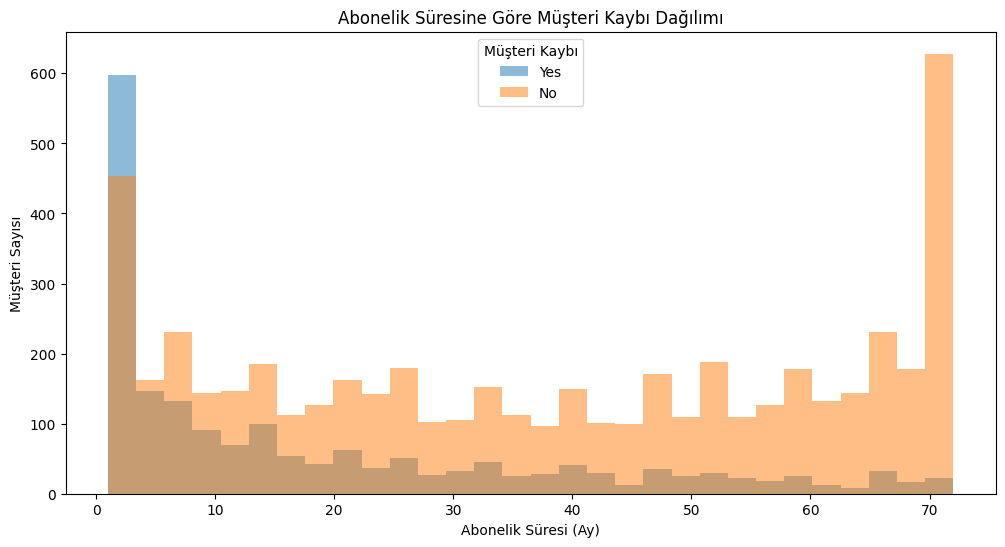

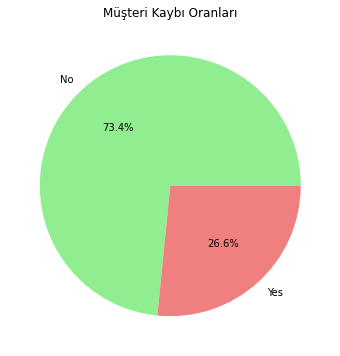

In [16]:
plt.figure(figsize=(10, 6))
kayip_oranlari = df['MüşteriKaybı'].value_counts()
plt.pie(kayip_oranlari, labels=kayip_oranlari.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Müşteri Kaybı Oranları')
plt.show()

<Figure size 864x432 with 0 Axes>

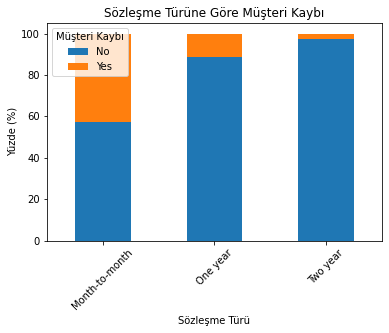

In [17]:
plt.figure(figsize=(12, 6))
ct = pd.crosstab(df['Sözleşme'], df['MüşteriKaybı'], normalize='index') * 100
ct.plot(kind='bar', stacked=True)
plt.title('Sözleşme Türüne Göre Müşteri Kaybı')
plt.xlabel('Sözleşme Türü')
plt.ylabel('Yüzde (%)')
plt.legend(title='Müşteri Kaybı')
plt.xticks(rotation=45)
plt.show()

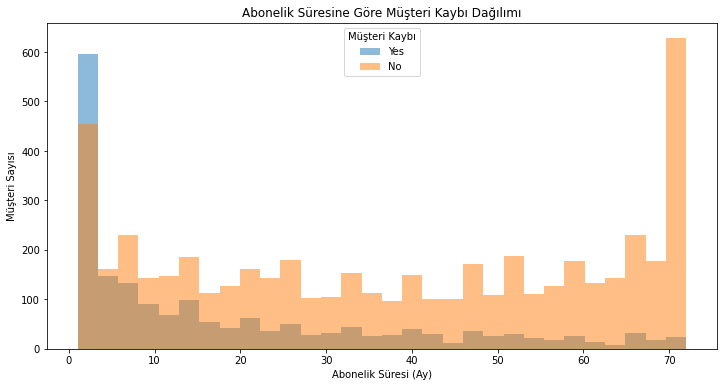

In [18]:
plt.figure(figsize=(12, 6))
for kayip in ['Yes', 'No']:
    data = df[df['MüşteriKaybı'] == kayip]['AbonelikSüresi (Ay)']
    plt.hist(data, bins=30, alpha=0.5, label=kayip)
plt.title('Abonelik Süresine Göre Müşteri Kaybı Dağılımı')
plt.xlabel('Abonelik Süresi (Ay)')
plt.ylabel('Müşteri Sayısı')
plt.legend(title='Müşteri Kaybı')
plt.show()

<Figure size 720x432 with 0 Axes>

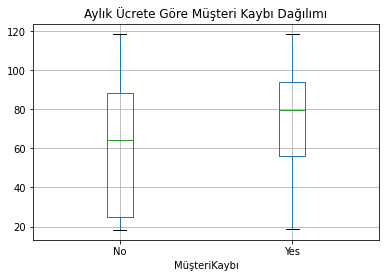

In [19]:
plt.figure(figsize=(10, 6))
df.boxplot(column='AylıkÜcret', by='MüşteriKaybı')
plt.title('Aylık Ücrete Göre Müşteri Kaybı Dağılımı')
plt.suptitle('')  # Otomatik başlığı kaldır
plt.show()

<Figure size 864x432 with 0 Axes>

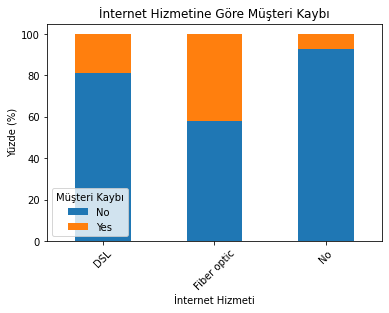

In [20]:
plt.figure(figsize=(12, 6))
ct = pd.crosstab(df['İnternetHizmeti'], df['MüşteriKaybı'], normalize='index') * 100
ct.plot(kind='bar', stacked=True)
plt.title('İnternet Hizmetine Göre Müşteri Kaybı')
plt.xlabel('İnternet Hizmeti')
plt.ylabel('Yüzde (%)')
plt.legend(title='Müşteri Kaybı')
plt.xticks(rotation=45)
plt.show()

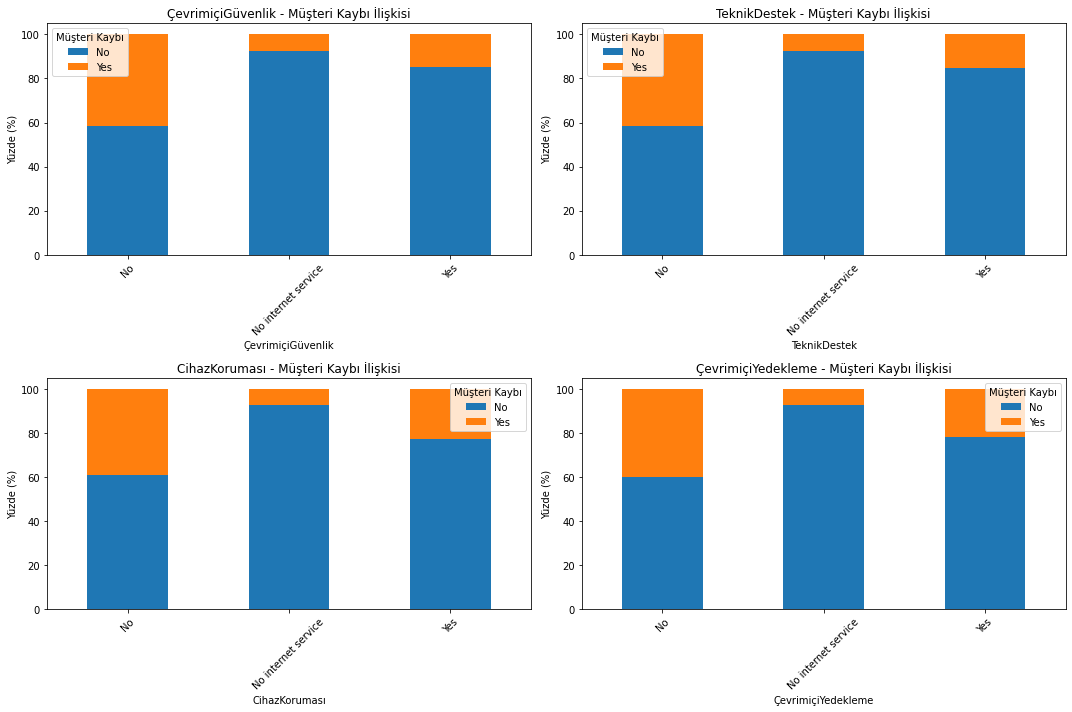

In [21]:
ozellikler = ['ÇevrimiçiGüvenlik', 'TeknikDestek', 'CihazKoruması', 'ÇevrimiçiYedekleme']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, ozellik in enumerate(ozellikler):
    row = i // 2
    col = i % 2
    
    ct = pd.crosstab(df[ozellik], df['MüşteriKaybı'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, ax=axes[row, col])
    
    axes[row, col].set_title(f'{ozellik} - Müşteri Kaybı İlişkisi')
    axes[row, col].set_xlabel(ozellik)
    axes[row, col].set_ylabel('Yüzde (%)')
    axes[row, col].legend(title='Müşteri Kaybı')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [23]:
for ozellik in ozellikler:
    print(f"\n{ozellik} için Müşteri Kaybı Dağılımı:")
    ct = pd.crosstab(df[ozellik], df['MüşteriKaybı'], normalize='index') * 100
    print(ct.round(2))


ÇevrimiçiGüvenlik için Müşteri Kaybı Dağılımı:
MüşteriKaybı            No    Yes
ÇevrimiçiGüvenlik                
No                   58.22  41.78
No internet service  92.57   7.43
Yes                  85.36  14.64

TeknikDestek için Müşteri Kaybı Dağılımı:
MüşteriKaybı            No    Yes
TeknikDestek                     
No                   58.35  41.65
No internet service  92.57   7.43
Yes                  84.80  15.20

CihazKoruması için Müşteri Kaybı Dağılımı:
MüşteriKaybı            No    Yes
CihazKoruması                    
No                   60.86  39.14
No internet service  92.57   7.43
Yes                  77.46  22.54

ÇevrimiçiYedekleme için Müşteri Kaybı Dağılımı:
MüşteriKaybı            No    Yes
ÇevrimiçiYedekleme               
No                   60.06  39.94
No internet service  92.57   7.43
Yes                  78.43  21.57


In [22]:
print("\nMüşteri Kaybı İstatistikleri:")
print("\n1. Genel Müşteri Kaybı Oranı:")
print(df['MüşteriKaybı'].value_counts(normalize=True).round(3) * 100)   

print("\n2. Sözleşme Türüne Göre Müşteri Kaybı Oranları:")
print(pd.crosstab(df['Sözleşme'], df['MüşteriKaybı'], normalize='index').round(3) * 100)

print("\n3. Ortalama Aylık Ücret (Müşteri Kaybına Göre):")
print(df.groupby('MüşteriKaybı')['AylıkÜcret'].mean().round(2))




Müşteri Kaybı İstatistikleri:

1. Genel Müşteri Kaybı Oranı:
MüşteriKaybı
No     73.4
Yes    26.6
Name: proportion, dtype: float64

2. Sözleşme Türüne Göre Müşteri Kaybı Oranları:
MüşteriKaybı      No   Yes
Sözleşme                  
Month-to-month  57.3  42.7
One year        88.7  11.3
Two year        97.2   2.8

3. Ortalama Aylık Ücret (Müşteri Kaybına Göre):
MüşteriKaybı
No     61.31
Yes    74.44
Name: AylıkÜcret, dtype: float64


In [ ]:
print("\n4. Ortalama Abonelik Süresi (Müşteri Kaybına Göre):")
print(df.groupby('MüşteriKaybı')['AbonelikSüresi (Ay)'].mean().round(2))

print("\n5. İnternet Hizmetine Göre Müşteri Kaybı Oranları:")
print(pd.crosstab(df['İnternetHizmeti'], df['MüşteriKaybı'], normalize='index').round(3) * 100)


4. Ortalama Abonelik Süresi (Müşteri Kaybına Göre):
MüşteriKaybı
No     37.65
Yes    17.98
Name: AbonelikSüresi (Ay), dtype: float64

5. İnternet Hizmetine Göre Müşteri Kaybı Oranları:
MüşteriKaybı       No   Yes
İnternetHizmeti            
DSL              81.0  19.0
Fiber optic      58.1  41.9
No               92.6   7.4


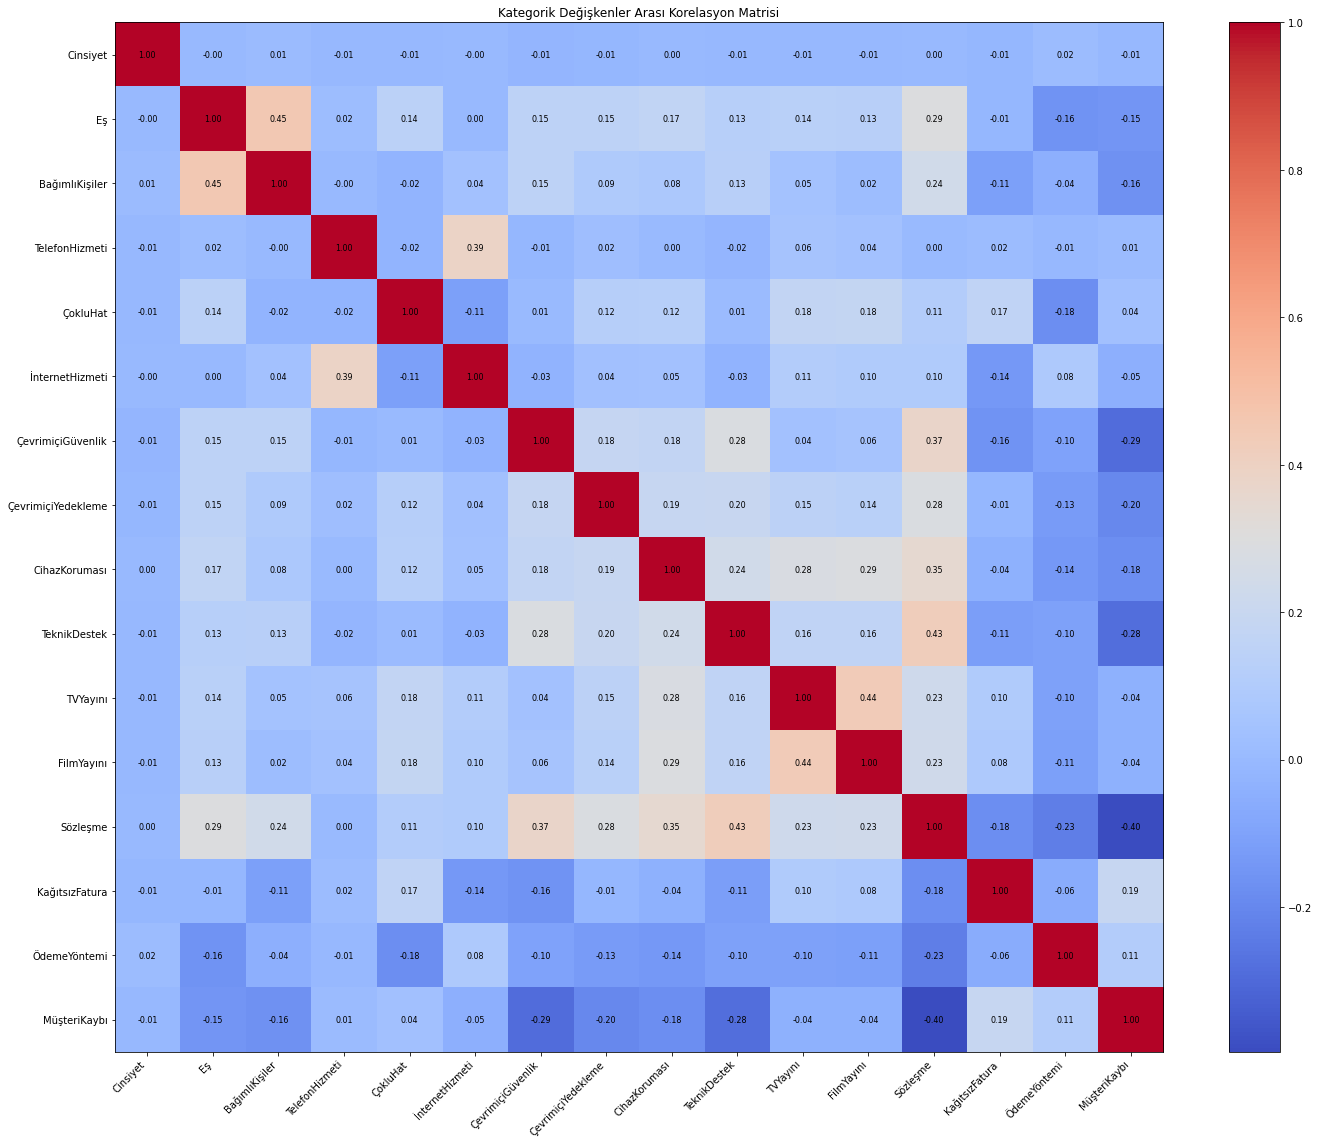


Korelasyon Değerleri:
                    Cinsiyet     Eş  BağımlıKişiler  TelefonHizmeti  ÇokluHat  \
Cinsiyet               1.000 -0.001           0.010          -0.008    -0.007   
Eş                    -0.001  1.000           0.452           0.018     0.143   
BağımlıKişiler         0.010  0.452           1.000          -0.001    -0.025   
TelefonHizmeti        -0.008  0.018          -0.001           1.000    -0.021   
ÇokluHat              -0.007  0.143          -0.025          -0.021     1.000   
İnternetHizmeti       -0.002  0.001           0.044           0.387    -0.109   
ÇevrimiçiGüvenlik     -0.015  0.151           0.151          -0.014     0.007   
ÇevrimiçiYedekleme    -0.012  0.153           0.090           0.024     0.117   
CihazKoruması          0.001  0.166           0.080           0.005     0.123   
TeknikDestek          -0.007  0.126           0.133          -0.018     0.011   
TVYayını              -0.006  0.137           0.046           0.056     0.175   
FilmY

In [36]:
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Backend'i değiştir
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Kategorik değişkenleri dönüştür
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = df.copy()
le = LabelEncoder()

for column in categorical_columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

# Korelasyon matrisi
correlation_matrix = df_encoded[categorical_columns].corr()

# Matplotlib ile manuel olarak oluşturalım
plt.figure(figsize=(20, 16))
im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')

# Değerleri ekle
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center', color='black',
                       fontsize=8)

# Eksenleri ayarla
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Colorbar ekle
plt.colorbar(im)

plt.title('Kategorik Değişkenler Arası Korelasyon Matrisi')
plt.tight_layout()
plt.show()

# Sayısal değerleri de göster
print("\nKorelasyon Değerleri:")
print(correlation_matrix.round(3))

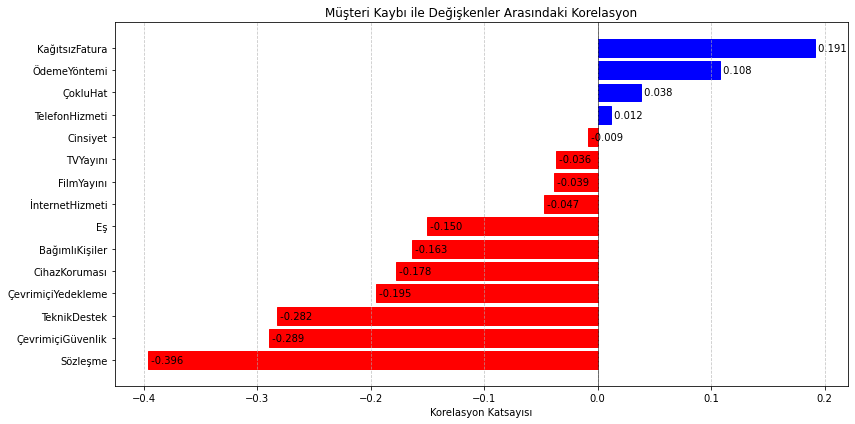


Müşteri Kaybı ile Korelasyonlar:
Sözleşme_encoded             -0.396
ÇevrimiçiGüvenlik_encoded    -0.289
TeknikDestek_encoded         -0.282
ÇevrimiçiYedekleme_encoded   -0.195
CihazKoruması_encoded        -0.178
BağımlıKişiler_encoded       -0.163
Eş_encoded                   -0.150
İnternetHizmeti_encoded      -0.047
FilmYayını_encoded           -0.039
TVYayını_encoded             -0.036
Cinsiyet_encoded             -0.009
TelefonHizmeti_encoded        0.012
ÇokluHat_encoded              0.038
ÖdemeYöntemi_encoded          0.108
KağıtsızFatura_encoded        0.191
Name: MüşteriKaybı_encoded, dtype: float64


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Kategorik değişkenleri sayısala çevir
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Kategorik değişkenleri dönüştür
df_encoded = df.copy()
le = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_encoded[column + '_encoded'] = le.fit_transform(df_encoded[column])

# Müşteri kaybı korelasyonlarını hesapla
musteri_kaybi_korelasyon = df_encoded[[col for col in df_encoded.columns if col.endswith('_encoded')]].corr()['MüşteriKaybı_encoded']
musteri_kaybi_korelasyon = musteri_kaybi_korelasyon[musteri_kaybi_korelasyon.index != 'MüşteriKaybı_encoded'].sort_values(ascending=True)

# Görselleştirme
plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(musteri_kaybi_korelasyon)), musteri_kaybi_korelasyon.values)
plt.yticks(range(len(musteri_kaybi_korelasyon)), [col.replace('_encoded', '') for col in musteri_kaybi_korelasyon.index])

# Çubukları renklendirme
for i, bar in enumerate(bars):
    if musteri_kaybi_korelasyon.values[i] < 0:
        bar.set_color('red')
    else:
        bar.set_color('blue')

# Değerleri çubukların üzerine yazma
for i, v in enumerate(musteri_kaybi_korelasyon.values):
    plt.text(v, i, f' {v:.3f}', va='center')

plt.title('Müşteri Kaybı ile Değişkenler Arasındaki Korelasyon')
plt.xlabel('Korelasyon Katsayısı')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Sayısal değerleri de göster
print("\nMüşteri Kaybı ile Korelasyonlar:")
print(musteri_kaybi_korelasyon.round(3))

In [ ]:
df

,Cinsiyet,KıdemliVatandaş,Eş,BağımlıKişiler,AbonelikSüresi (Ay),TelefonHizmeti,ÇokluHat,İnternetHizmeti,ÇevrimiçiGüvenlik,ÇevrimiçiYedekleme,CihazKoruması,TeknikDestek,TVYayını,FilmYayını,Sözleşme,KağıtsızFatura,ÖdemeYöntemi,AylıkÜcret,ToplamÜcret,MüşteriKaybı
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# 1. Kategorik değişkenleri sayısala çevir
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' and col != 'MüşteriKaybı':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le


In [ ]:
df_encoded

,Cinsiyet,KıdemliVatandaş,Eş,BağımlıKişiler,AbonelikSüresi,TelefonHizmeti,ÇokluHat,İnternetHizmeti,ÇevrimiçiGüvenlik,ÇevrimiçiYedekleme,CihazKoruması,TeknikDestek,TVYayını,FilmYayını,Sözleşme,KağıtsızFatura,ÖdemeYöntemi,AylıkÜcret,ToplamÜcret,MüşteriKaybı
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,No
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,No
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,No
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,Yes


In [ ]:
print(df_encoded['MüşteriKaybı'].unique())


['No' 'Yes']


In [ ]:
print(df_encoded['MüşteriKaybı'].unique())
print(df_encoded['MüşteriKaybı'].value_counts(dropna=False))
print(df_encoded['MüşteriKaybı'].dtype)

['No' 'Yes']
MüşteriKaybı
No     5163
Yes    1869
Name: count, dtype: int64
object


In [ ]:
print(df_encoded[['MüşteriKaybı']].drop_duplicates())

  MüşteriKaybı
0           No
2          Yes


In [ ]:
# Tüm benzersiz değerleri yazdır
print(df_encoded['MüşteriKaybı'].unique())

# Mapping'i genişlet
mapping = {}
for val in df_encoded['MüşteriKaybı'].unique():
    print(f"'{val}'")
    # İstersen burada elle eşleştirme yapabilirsin

# Örneğin:
df_encoded['MüşteriKaybı'] = df_encoded['MüşteriKaybı'].replace({
    'Evet': 1,
    'Hayır': 0,
    'Yes': 1,
    'No': 0,
    # Gerekirse diğer varyasyonları ekle
})

['No' 'Yes']
'No'
'Yes'


C:\Users\user\AppData\Local\Temp\ipykernel_17556\3958966863.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['MüşteriKaybı'] = df_encoded['MüşteriKaybı'].replace({


In [ ]:
df_encoded.head()

,Cinsiyet,KıdemliVatandaş,Eş,BağımlıKişiler,AbonelikSüresi (Ay),TelefonHizmeti,ÇokluHat,İnternetHizmeti,ÇevrimiçiGüvenlik,ÇevrimiçiYedekleme,CihazKoruması,TeknikDestek,TVYayını,FilmYayını,Sözleşme,KağıtsızFatura,ÖdemeYöntemi,AylıkÜcret,ToplamÜcret,MüşteriKaybı
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
print(df_encoded['KıdemliVatandaş'].unique())

[0 1]


In [ ]:

# 2. Özellikler ve hedefi ayır
X = df_encoded.drop('MüşteriKaybı', axis=1)

y = df_encoded['MüşteriKaybı']

# 3. Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modeli eğit
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Modelin performansını kontrol et
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7825159914712153
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.77      0.78      0.78      1407

Confusion Matrix:
[[911 122]
 [184 190]]


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# 4. Modeli eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score

# Test verisi üzerinde tahmin yap
y_pred = model.predict(X_test)

# Doğruluk oranını hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin doğruluk oranı: {accuracy:.2f}")
print(f"Modelin doğruluk oranı: %{accuracy*100:.2f}")

Modelin doğruluk oranı: 0.78
Modelin doğruluk oranı: %78.25


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree doğruluk: %{dt_acc*100:.2f}")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest doğruluk: %{rf_acc*100:.2f}")

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM doğruluk: %{svm_acc*100:.2f}")

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"KNN doğruluk: %{knn_acc*100:.2f}")

Decision Tree doğruluk: %72.49
Random Forest doğruluk: %79.25
SVM doğruluk: %73.42
KNN doğruluk: %77.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cinsiyet             7032 non-null   object 
 1   KıdemliVatandaş      7032 non-null   int64  
 2   Eş                   7032 non-null   object 
 3   BağımlıKişiler       7032 non-null   object 
 4   AbonelikSüresi (Ay)  7032 non-null   int64  
 5   TelefonHizmeti       7032 non-null   object 
 6   ÇokluHat             7032 non-null   object 
 7   İnternetHizmeti      7032 non-null   object 
 8   ÇevrimiçiGüvenlik    7032 non-null   object 
 9   ÇevrimiçiYedekleme   7032 non-null   object 
 10  CihazKoruması        7032 non-null   object 
 11  TeknikDestek         7032 non-null   object 
 12  TVYayını             7032 non-null   object 
 13  FilmYayını           7032 non-null   object 
 14  Sözleşme             7032 non-null   object 
 15  KağıtsızFatura       7032 non-null   object

In [ ]:
for col, le in label_encoders.items():
    print(f"{col} için kategoriler ve kodları:")
    for idx, class_ in enumerate(le.classes_):
        print(f"  {class_}: {idx}")
    print()

Cinsiyet için kategoriler ve kodları:
  Female: 0
  Male: 1

Eş için kategoriler ve kodları:
  No: 0
  Yes: 1

BağımlıKişiler için kategoriler ve kodları:
  No: 0
  Yes: 1

TelefonHizmeti için kategoriler ve kodları:
  No: 0
  Yes: 1

ÇokluHat için kategoriler ve kodları:
  No: 0
  No phone service: 1
  Yes: 2

İnternetHizmeti için kategoriler ve kodları:
  DSL: 0
  Fiber optic: 1
  No: 2

ÇevrimiçiGüvenlik için kategoriler ve kodları:
  No: 0
  No internet service: 1
  Yes: 2

ÇevrimiçiYedekleme için kategoriler ve kodları:
  No: 0
  No internet service: 1
  Yes: 2

CihazKoruması için kategoriler ve kodları:
  No: 0
  No internet service: 1
  Yes: 2

TeknikDestek için kategoriler ve kodları:
  No: 0
  No internet service: 1
  Yes: 2

TVYayını için kategoriler ve kodları:
  No: 0
  No internet service: 1
  Yes: 2

FilmYayını için kategoriler ve kodları:
  No: 0
  No internet service: 1
  Yes: 2

Sözleşme için kategoriler ve kodları:
  Month-to-month: 0
  One year: 1
  Two year: 2

Kağı

In [ ]:
def kullanicidan_veri_al_sayisal(label_encoders, X_columns):
    # Değerlerin Türkçe karşılıkları
    deger_karsiliklari = {
        'Yes': 'Evet',
        'No': 'Hayır',
        'No phone service': 'Telefon hizmeti yok',
        'No internet service': 'İnternet hizmeti yok',
        'DSL': 'DSL',
        'Fiber optic': 'Fiber optik',
        'Male': 'Erkek',
        'Female': 'Kadın',
        'Month-to-month': 'Aylık',
        'One year': 'Bir yıllık',
        'Two year': 'İki yıllık',
        'Electronic check': 'Elektronik ödeme',
        'Mailed check': 'Posta çeki',
        'Bank transfer (automatic)': 'Otomatik banka havalesi',
        'Credit card (automatic)': 'Otomatik kredi kartı'
    }
    
    yeni_musteri = {}
    
    print("\n=== Müşteri Bilgi Giriş Formu ===")
    print("Lütfen aşağıdaki bilgileri doldurun:\n")
    
    for col in [c for c in X_columns if c != 'ToplamÜcret']:
        while True:
            try:
                if col == 'KıdemliVatandaş':
                    deger = input(f"{col} (0: Kıdemli Değil, 1: Kıdemli) -> ")
                    deger = int(deger)
                    if deger not in [0, 1]:
                        raise ValueError("Lütfen 0 veya 1 girin!")
                
                elif col == 'AbonelikSüresi (Ay)':
                    deger = input(f"{col} -> ")
                    deger = float(deger)
                    if deger.is_integer():
                        deger = int(deger)
                
                elif col in label_encoders:
                    # Seçenekleri input mesajında göster
                    secenekler = [f"{idx}: {class_}/{deger_karsiliklari.get(class_, class_)}" 
                                for idx, class_ in enumerate(label_encoders[col].classes_)]
                    secenekler_str = " | ".join(secenekler)
                    deger = input(f"{col} ({secenekler_str}) -> ")
                    deger = int(deger)
                    if deger < 0 or deger >= len(label_encoders[col].classes_):
                        raise ValueError("Geçersiz seçenek!")
                
                else:
                    deger = input(f"{col} -> ")
                    deger = float(deger)
                    if deger.is_integer():
                        deger = int(deger)
                
                yeni_musteri[col] = deger
                break
                
            except ValueError as e:
                print(f"\nHata: Geçersiz giriş! {str(e)}")
                print("Lütfen tekrar deneyin.")
    
    # Toplam ücreti otomatik hesapla
    yeni_musteri['ToplamÜcret'] = yeni_musteri['AylıkÜcret'] * yeni_musteri['AbonelikSüresi (Ay)']
    print(f"\nToplam Ücret otomatik hesaplandı: {yeni_musteri['ToplamÜcret']:.2f} TL")
    
    return yeni_musteri

def yeni_veri_tahmin(yeni_musteri, model):
    # Değerlerin Türkçe karşılıkları
    deger_karsiliklari = {
        'Yes': 'Evet',
        'No': 'Hayır',
        'No phone service': 'Telefon hizmeti yok',
        'No internet service': 'İnternet hizmeti yok',
        'DSL': 'DSL',
        'Fiber optic': 'Fiber optik',
        'Male': 'Erkek',
        'Female': 'Kadın',
        'Month-to-month': 'Aylık',
        'One year': 'Bir yıllık',
        'Two year': 'İki yıllık',
        'Electronic check': 'Elektronik ödeme',
        'Mailed check': 'Posta çeki',
        'Bank transfer (automatic)': 'Otomatik banka havalesi',
        'Credit card (automatic)': 'Otomatik kredi kartı'
    }
    
    # Veriyi DataFrame'e çevir
    yeni_veri = pd.DataFrame([yeni_musteri])
    
    # Tahmin yap
    tahmin = model.predict(yeni_veri)
    tahmin_sonucu = "Müşteri Kaybı Riski" if tahmin[0] == 1 else "Müşteri Kalıcı"
    
    # Sonuçları DataFrame olarak hazırla
    sonuc_dict = {}
    aciklama_dict = {}
    
    for col, value in yeni_musteri.items():
        if col == 'AbonelikSüresi (Ay)':
            sonuc_dict[col] = value
            aciklama_dict[col] = f"{value} ay"
        elif col == 'ToplamÜcret':
            sonuc_dict[col] = value
            aciklama_dict[col] = f"{value:.2f} TL (Otomatik hesaplandı)"
        elif col == 'KıdemliVatandaş':
            sonuc_dict[col] = value
            aciklama_dict[col] = f"{value} ({'Kıdemli' if value == 1 else 'Kıdemli Değil'})"
        elif col == 'AylıkÜcret':
            sonuc_dict[col] = value
            aciklama_dict[col] = f"{value:.2f} TL"
        elif col in label_encoders:
            sonuc_dict[col] = value
            sinif_adi = label_encoders[col].classes_[value]
            turkce_karsilik = deger_karsiliklari.get(sinif_adi, sinif_adi)
            aciklama_dict[col] = f"{value} ({sinif_adi}/{turkce_karsilik})"
        else:
            sonuc_dict[col] = value
            aciklama_dict[col] = str(value)
    
    # Tahmin sonucunu ekle
    sonuc_dict['Tahmin Sonucu'] = tahmin[0]
    aciklama_dict['Tahmin Sonucu'] = tahmin_sonucu
    
    # İki DataFrame oluştur
    df_sayisal = pd.DataFrame([sonuc_dict]).T
    df_sayisal.columns = ['Sayısal Değer']
    
    df_aciklama = pd.DataFrame([aciklama_dict]).T
    df_aciklama.columns = ['Açıklama']
    
    # DataFrame'leri birleştir
    sonuc_df = pd.concat([df_sayisal, df_aciklama], axis=1)
    
    # Sonuçları göster
    print("\n=== Müşteri Bilgileri ve Tahmin Sonucu ===")
    print("\n", sonuc_df)
    
    return tahmin_sonucu

# Kullanıcıdan veri al ve tahmin yap
try:
    print("\n=== Müşteri Kayıp Tahmin Sistemi ===")
    yeni_musteri = kullanicidan_veri_al_sayisal(label_encoders, X.columns)
    sonuc = yeni_veri_tahmin(yeni_musteri, model)
except Exception as e:
    print(f"\nBir hata oluştu: {str(e)}")


=== Müşteri Kayıp Tahmin Sistemi ===

=== Müşteri Bilgi Giriş Formu ===
Lütfen aşağıdaki bilgileri doldurun:


Toplam Ücret otomatik hesaplandı: 60.00 TL

=== Müşteri Bilgileri ve Tahmin Sonucu ===

                      Sayısal Değer                        Açıklama
Cinsiyet                         1                  1 (Male/Erkek)
KıdemliVatandaş                  0               0 (Kıdemli Değil)
Eş                               0                    0 (No/Hayır)
BağımlıKişiler                   0                    0 (No/Hayır)
AbonelikSüresi (Ay)              2                            2 ay
TelefonHizmeti                   1                    1 (Yes/Evet)
ÇokluHat                         2                    2 (Yes/Evet)
İnternetHizmeti                  1     1 (Fiber optic/Fiber optik)
ÇevrimiçiGüvenlik                2                    2 (Yes/Evet)
ÇevrimiçiYedekleme               2                    2 (Yes/Evet)
CihazKoruması                    2                    2 (Yes/E